# <span style="color:#4b0082">**Análisis de los DataSets**</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import funciones as f
pd.set_option('display.max_rows', 500)


## <span style="color:#65ee30">*Dataset brindado por OACI*</span>

In [93]:
df_accidentes = pd.read_csv(r'csv/AccidentesAviones_Henry.csv')
df_accidentes.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [94]:
# Eliminamos la columna "Unnamed: 0" que contiene los indices del Dataset
df_accidentes = df_accidentes.drop(columns='Unnamed: 0')

In [95]:
#Pasamos todo a minuscula las columnas
for columna in df_accidentes.columns:
    col = str(columna).lower() 
    df_accidentes.rename(columns={columna:col}, inplace=True)       

df_accidentes.columns

Index(['fecha', 'hora declarada', 'ruta', 'operador', 'flight_no', 'route',
       'ac_type', 'registration', 'cn_ln', 'all_aboard', 'pasajeros a bordo',
       'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [96]:
df_accidentes.head(3)

,fecha,hora declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros a bordo,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [97]:
#Dimensiones del Dataset
df_accidentes.shape

(5008, 17)

#### Miramos el porcentaje de nulos y valores únicos

In [98]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   hora declarada          5008 non-null   object
 2   ruta                    5008 non-null   object
 3   operador                5008 non-null   object
 4   flight_no               5008 non-null   object
 5   route                   5008 non-null   object
 6   ac_type                 5008 non-null   object
 7   registration            5008 non-null   object
 8   cn_ln                   5008 non-null   object
 9   all_aboard              5008 non-null   object
 10  pasajeros a bordo       5008 non-null   object
 11  crew_aboard             5008 non-null   object
 12  cantidad de fallecidos  5008 non-null   object
 13  passenger_fatalities    5008 non-null   object
 14  crew_fatalities         5008 non-null   object
 15  grou

In [99]:
nulos = (df_accidentes.isnull().sum()) / len(df_accidentes) * 100
nulos

fecha                     0.0
hora declarada            0.0
ruta                      0.0
operador                  0.0
flight_no                 0.0
route                     0.0
ac_type                   0.0
registration              0.0
cn_ln                     0.0
all_aboard                0.0
pasajeros a bordo         0.0
crew_aboard               0.0
cantidad de fallecidos    0.0
passenger_fatalities      0.0
crew_fatalities           0.0
ground                    0.0
summary                   0.0
dtype: float64

Vemos que algunos registros tienen el carácter **?** que representa información que se desconoce pero Pandas no lo toma como NaN.
Entonces, vamos a ver cuantos registros tenemos con este carácter.

In [100]:
x = list()
y = list()

for columna in df_accidentes.columns:
    porcentaje = f.porcentajeCaracter(df_accidentes, str(columna), '?')
    x.append(columna)
    y.append(porcentaje)

print(x)
print(y)

['fecha', 'hora declarada', 'ruta', 'operador', 'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard', 'pasajeros a bordo', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground', 'summary']
[0.0, 30.03, 0.1, 0.2, 73.52, 15.22, 0.26, 5.43, 13.32, 0.34, 4.41, 4.37, 0.16, 4.69, 4.69, 0.88, 1.18]


In [7]:
plt.rcParams['font.size'] = 15

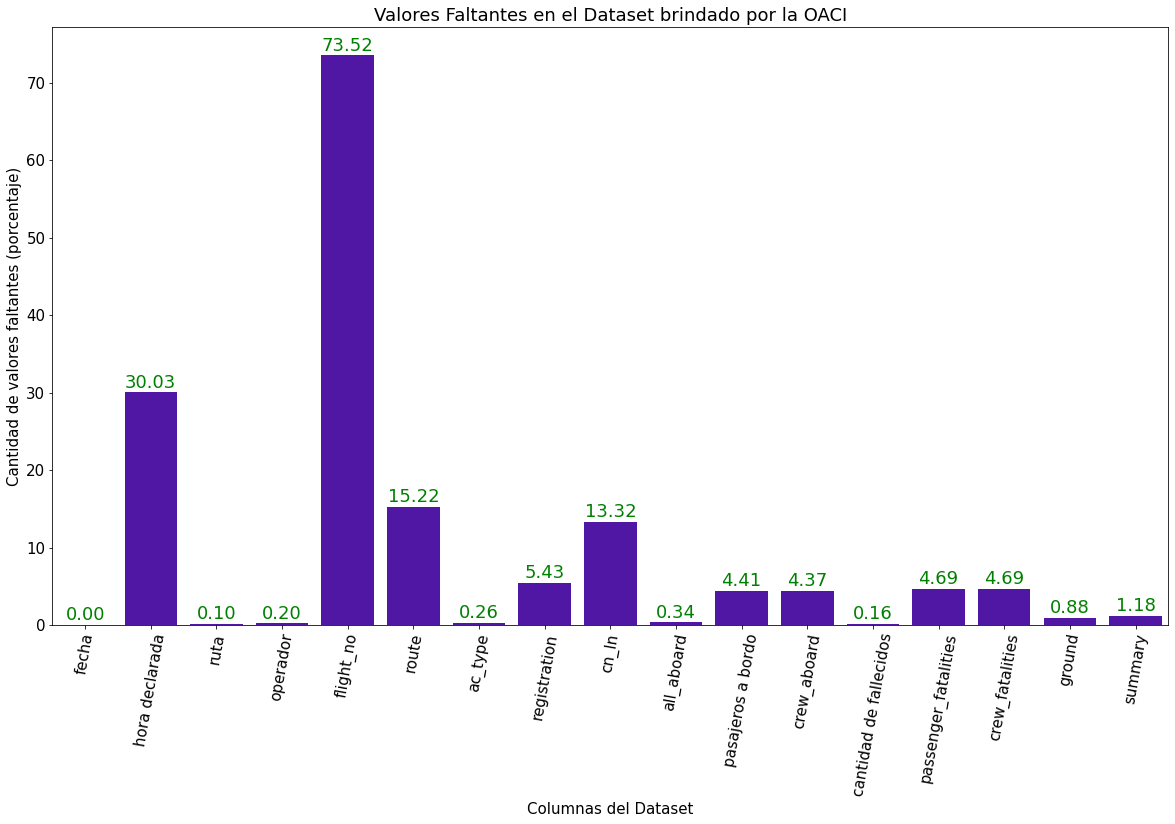

In [102]:
f.graficarBar(x, y, 'Valores Faltantes en el Dataset brindado por la OACI', 'Columnas del Dataset', 'Cantidad de valores faltantes (porcentaje)')


In [103]:
unicos = (df_accidentes.nunique()).sort_values(ascending=False)
unicos = unicos.apply(lambda x : round(x / len(df_accidentes) * 100, 2))

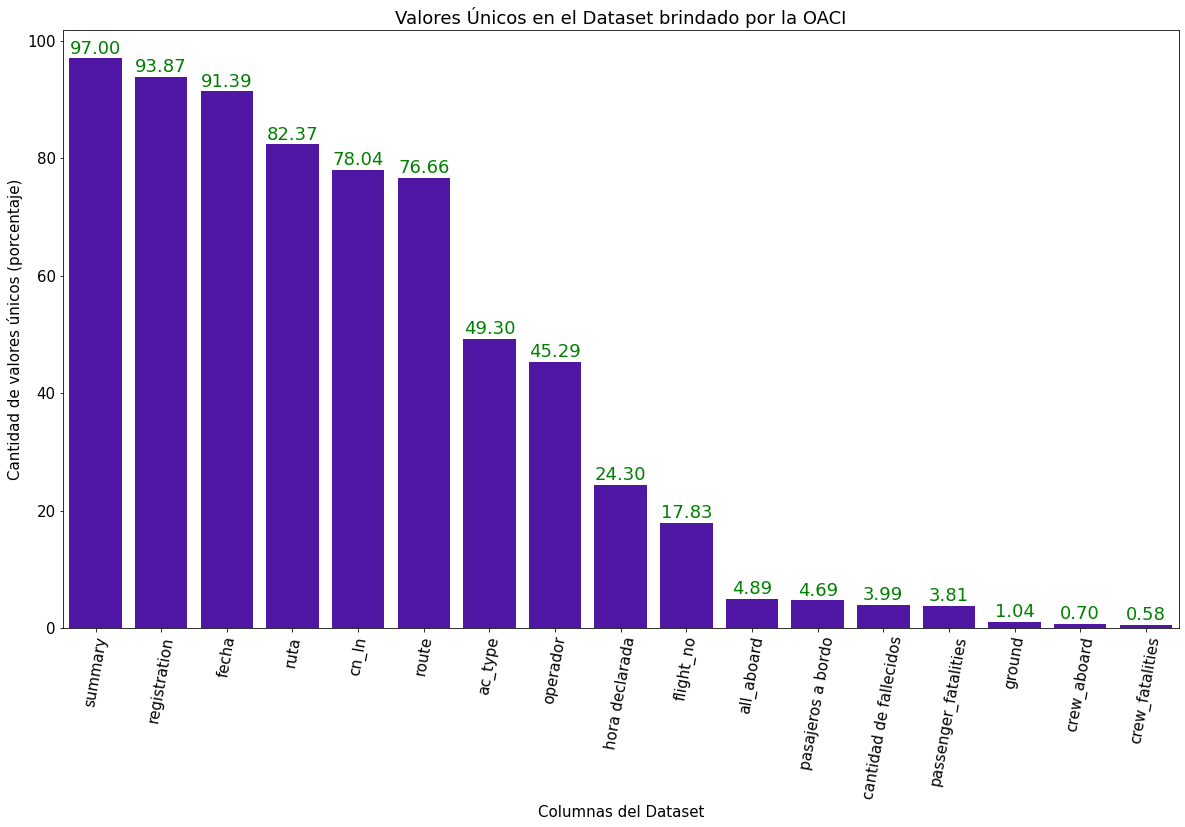

In [104]:
f.graficarBar(unicos.index, unicos,'Valores Únicos en el Dataset brindado por la OACI', 'Columnas del Dataset', 'Cantidad de valores únicos (porcentaje)')

Vemos si hay duplicados. Por el resultado obtenido sabemos que no tenemos registros duplicados.

In [105]:
df_accidentes[df_accidentes.duplicated()]

,fecha,hora declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros a bordo,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary


Vemos las columnas relacionadas con las cantidad de personas a bordo y fallecidos. Por el momento es para visualizar. En el Dataset definitivo vamos a equilibrar si hay diferencias entre los fallecidos y los que iban a bordo.

In [106]:
df_accidentes[['all_aboard', 'crew_aboard', 'pasajeros a bordo', 'crew_fatalities', 'passenger_fatalities', 'cantidad de fallecidos', 'ground']].head(10)


,all_aboard,crew_aboard,pasajeros a bordo,crew_fatalities,passenger_fatalities,cantidad de fallecidos,ground
0,2,1,1,0,1,1,0
1,1,1,0,0,0,1,0
2,5,5,0,5,0,5,0
3,1,1,0,1,0,1,0
4,20,?,?,?,?,14,0
5,28,?,?,?,?,28,0
6,41,41,0,17,0,17,0
7,19,?,?,?,?,19,0
8,20,?,?,?,?,20,0
9,22,?,?,?,?,22,0


In [107]:
# Cantidad de aeronaves diferentes
df_accidentes['ac_type'].nunique()

2469

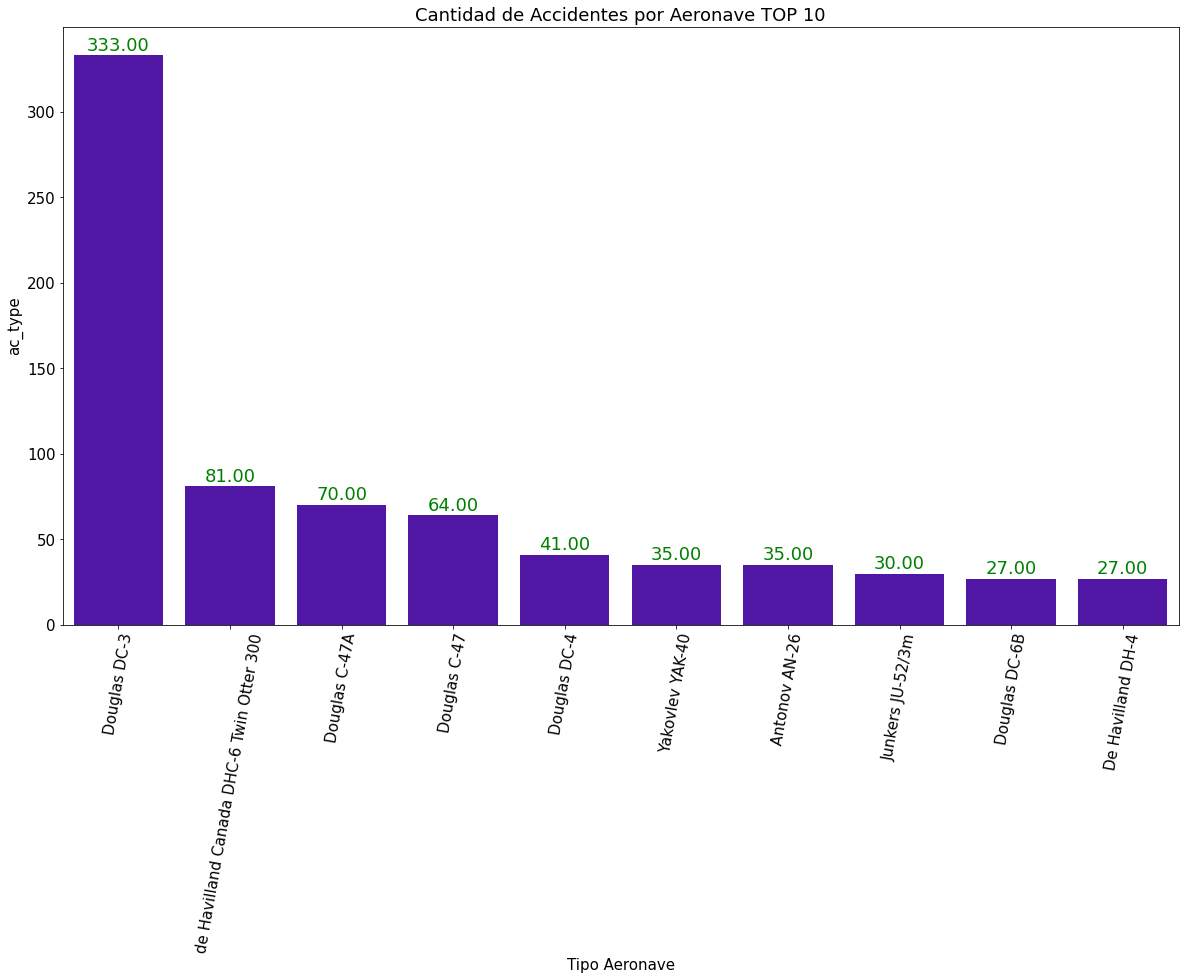

In [108]:
# Cantidad de accidentes por aeronave
aeronaves = df_accidentes['ac_type'][df_accidentes.ac_type != '?'].value_counts().sort_values(ascending=False).head(10)
f.graficarBar(aeronaves.index, aeronaves,'Cantidad de Accidentes por Aeronave TOP 10', 'Tipo Aeronave','Cantidad accidentes')


#### Comenzamos a normalizar algunos datos del Dataset 

In [109]:
# Cambiamos el nombre de columnas
df_accidentes.rename(columns={'ruta':'LugarAccidente', 
                   'operador':'Operador',
                   'route':'OrigenDestino',
                   'ac_type':'TipoAeronave',
                   'fecha':'Fecha',
                   'all_aboard':'TotalAbordo',
                   'crew_aboard':'TripulacionAbordo',
                   'pasajeros a bordo':'PasajerosAbordo',
                   'cantidad de fallecidos':'TotalFallecidos',
                   'crew_fatalities':'TripulacionFallecida',
                   'passenger_fatalities':'PasajerosFallecidos',
                   'ground':'FallecidosEnTierra'
                 }, inplace=True)

In [110]:
# Seleccionamos las columnas útiles para este análisis
df_filtrado = df_accidentes[['Fecha', 
                  'LugarAccidente', 
                  'Operador',
                  'OrigenDestino',
                  'TipoAeronave',
                  'TotalAbordo',
                  'TripulacionAbordo',
                  'PasajerosAbordo',
                  'TotalFallecidos',
                  'TripulacionFallecida',
                  'PasajerosFallecidos',
                  'FallecidosEnTierra'
                ]]

In [111]:
df_filtrado.head()

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,0,1,0
1,"September 07, 1909","Juvisy-sur-Orge, France",?,Air show,Wright Byplane,1,1,0,1,0,0,0
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,5,0,5,5,0,0
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,?,Curtiss seaplane,1,1,0,1,1,0,0
4,"September 09, 1913",Over the North Sea,Military - German Navy,?,Zeppelin L-1 (airship),20,?,?,14,?,?,0


In [112]:
# Guardamos en CSV para ir teniendo un orden 
df_filtrado.to_csv('csv/AccidentesAereosv1.csv', index=False)

### <span style="color:#ff4430">Reemplazamos Nulos</span>

In [145]:
#df_filtrado = pd.read_csv('csv/AccidentesAereosv1.csv')

In [146]:
# Cantidad de registros y columnas resultantes
df_filtrado.shape

(5008, 12)

In [147]:
df_filtrado.columns

Index(['Fecha', 'LugarAccidente', 'Operador', 'OrigenDestino', 'TipoAeronave',
       'TotalAbordo', 'TripulacionAbordo', 'PasajerosAbordo',
       'TotalFallecidos', 'TripulacionFallecida', 'PasajerosFallecidos',
       'FallecidosEnTierra'],
      dtype='object')

In [148]:
# Reemplazamos los nulos 'Sin dato' para texto y 0 para números
for i in range(12):
    if i < 5:
        df_filtrado.loc[:][df_filtrado.columns[i]].replace('?', 'Sin dato', inplace=True)
    else:
        df_filtrado.loc[:][df_filtrado.columns[i]].replace('?', 0, inplace=True)

In [ ]:
#Guardamos
df_filtrado.to_csv('csv/AccidentesAereosv2.csv', index=False)

In [149]:
df_filtrado.head()

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,0,1,0
1,"September 07, 1909","Juvisy-sur-Orge, France",Sin dato,Air show,Wright Byplane,1,1,0,1,0,0,0
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,5,0,5,5,0,0
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,Sin dato,Curtiss seaplane,1,1,0,1,1,0,0
4,"September 09, 1913",Over the North Sea,Military - German Navy,Sin dato,Zeppelin L-1 (airship),20,0,0,14,0,0,0


### <span style="color:#ff4430">Cambio de Tipo</span>

In [150]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fecha                 5008 non-null   object
 1   LugarAccidente        5008 non-null   object
 2   Operador              5008 non-null   object
 3   OrigenDestino         5008 non-null   object
 4   TipoAeronave          5008 non-null   object
 5   TotalAbordo           5008 non-null   object
 6   TripulacionAbordo     5008 non-null   object
 7   PasajerosAbordo       5008 non-null   object
 8   TotalFallecidos       5008 non-null   object
 9   TripulacionFallecida  5008 non-null   object
 10  PasajerosFallecidos   5008 non-null   object
 11  FallecidosEnTierra    5008 non-null   object
dtypes: object(12)
memory usage: 469.6+ KB


In [151]:
# Cambiamos de tipo de str a int en las columnas de la 5 a 11 porque contienen números
for i in range(5, 12):
    df_filtrado[df_filtrado.columns[i]] = df_filtrado[df_filtrado.columns[i]].apply(lambda x : int(x))

In [152]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fecha                 5008 non-null   object
 1   LugarAccidente        5008 non-null   object
 2   Operador              5008 non-null   object
 3   OrigenDestino         5008 non-null   object
 4   TipoAeronave          5008 non-null   object
 5   TotalAbordo           5008 non-null   int64 
 6   TripulacionAbordo     5008 non-null   int64 
 7   PasajerosAbordo       5008 non-null   int64 
 8   TotalFallecidos       5008 non-null   int64 
 9   TripulacionFallecida  5008 non-null   int64 
 10  PasajerosFallecidos   5008 non-null   int64 
 11  FallecidosEnTierra    5008 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 469.6+ KB


In [153]:
#Guardamos de nuevo 
df_filtrado.to_csv('csv/AccidentesAereosv3.csv', index=False)

### <span style="color:#ff4430">Obtención de Longitud y Latitud</span>

Usamos la librería de geopy para sacar la latitud y longitud del lugar dónde ocurrió el accidente

In [170]:
from geopy.geocoders import Nominatim

In [171]:
loc = Nominatim(user_agent='GetLoc')

In [180]:
df_final = pd.read_csv('csv/AccidentesAereosv3.csv')

In [181]:
df_final['Longitud'] = 0.0
df_final['Latitud'] = 0.0

In [182]:
df_final.head(10)

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra,Longitud,Latitud
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,0,1,0,0.0,0.0
1,"September 07, 1909","Juvisy-sur-Orge, France",Sin dato,Air show,Wright Byplane,1,1,0,1,0,0,0,0.0,0.0
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,5,0,5,5,0,0,0.0,0.0
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,Sin dato,Curtiss seaplane,1,1,0,1,1,0,0,0.0,0.0
4,"September 09, 1913",Over the North Sea,Military - German Navy,Sin dato,Zeppelin L-1 (airship),20,0,0,14,0,0,0,0.0,0.0
5,"October 17, 1913","Near Johannisthal, Germany",Military - German Navy,Sin dato,Zeppelin L-2 (airship),28,0,0,28,0,0,0,0.0,0.0
6,"March 05, 1915","Tienen, Belgium",Military - German Navy,Sin dato,Zeppelin L-8 (airship),41,41,0,17,17,0,0,0.0,0.0
7,"September 03, 1915","Off Cuxhaven, Germany",Military - German Navy,Sin dato,Zeppelin L-10 (airship),19,0,0,19,0,0,0,0.0,0.0
8,"July 28, 1916","Near Jambol, Bulgeria",Military - German Army,Sin dato,Schutte-Lanz S-L-10 (airship),20,0,0,20,0,0,0,0.0,0.0
9,"September 24, 1916","Billericay, England",Military - German Navy,Sin dato,Zeppelin L-32 (airship),22,0,0,22,0,0,0,0.0,0.0


In [183]:
# Eliminamos la palabra "Near" y "off" de las ubicaciones de los accidentes
# para poder obtener la longitud y la latitud
fin = len(df_final)
for i in range(fin):
    lugar = df_final['LugarAccidente'].iloc[i]
    if 'Near' in lugar:
        lugar = lugar.replace('Near', '')
    
    if 'near' in lugar:
        lugar = lugar.replace('near', '')

    if 'Off' in lugar:
        lugar = lugar.replace('Off', '')

    if 'off' in lugar:
        lugar = lugar.replace('off', '')

    if 'Bulgeria' in lugar:
        lugar = lugar.replace('Bulgeria', 'Bulgaria')

    # Asignamos el valor del lugar ya procesado al registro en el DataFrame
    df_final.loc[i, 'LugarAccidente'] = lugar

In [184]:
df_final.head(10)

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra,Longitud,Latitud
0,"September 17, 1908","Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,0,1,0,0.0,0.0
1,"September 07, 1909","Juvisy-sur-Orge, France",Sin dato,Air show,Wright Byplane,1,1,0,1,0,0,0,0.0,0.0
2,"July 12, 1912","Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,5,0,5,5,0,0,0.0,0.0
3,"August 06, 1913","Victoria, British Columbia, Canada",Private,Sin dato,Curtiss seaplane,1,1,0,1,1,0,0,0.0,0.0
4,"September 09, 1913",Over the North Sea,Military - German Navy,Sin dato,Zeppelin L-1 (airship),20,0,0,14,0,0,0,0.0,0.0
5,"October 17, 1913","Johannisthal, Germany",Military - German Navy,Sin dato,Zeppelin L-2 (airship),28,0,0,28,0,0,0,0.0,0.0
6,"March 05, 1915","Tienen, Belgium",Military - German Navy,Sin dato,Zeppelin L-8 (airship),41,41,0,17,17,0,0,0.0,0.0
7,"September 03, 1915","Cuxhaven, Germany",Military - German Navy,Sin dato,Zeppelin L-10 (airship),19,0,0,19,0,0,0,0.0,0.0
8,"July 28, 1916","Jambol, Bulgaria",Military - German Army,Sin dato,Schutte-Lanz S-L-10 (airship),20,0,0,20,0,0,0,0.0,0.0
9,"September 24, 1916","Billericay, England",Military - German Navy,Sin dato,Zeppelin L-32 (airship),22,0,0,22,0,0,0,0.0,0.0


Ahora, obtenemos la longitud y latitud

In [185]:
# Obtenemos la cantidad de registros
fin = len(df_final)

# Recorremos los registros
for i in range(fin):
    cadena = df_final.loc[i, 'LugarAccidente']
    lng = df_final.loc[i, 'Longitud']

    # Si es distinto de "Sin dato"
    if cadena != 'Sin dato' and lng == 0.0:

        # Contamos las comas para poder separar
        cant_comas = 0
        for char in cadena:
            if char == ',':
                cant_comas += 1
        
        if cant_comas == 1:
            estado, pais = cadena.split(',')
            lugar = estado + ' ' + pais
        elif cant_comas == 2:
            ciudad, estado, pais = cadena.split(',')
            lugar = ciudad + ' ' + estado + ' ' + pais

        try:
            getloc = loc.geocode(lugar)
            df_final.loc[i, 'Longitud'] = getloc.longitude
            df_final.loc[i, 'Latitud'] = getloc.latitude
        except:
            try:
                if cant_comas > 0:
                    lugar = cadena[cadena.rfind(','): ]
                    
                    getloc = loc.geocode(lugar)
                    df_final.loc[i, 'Longitud'] = getloc.longitude
                    df_final.loc[i, 'Latitud'] = getloc.latitude
            except:
                pass
            

Verificamos cuantos registros se quedaron sin longitud o latitud

In [186]:
df_final['Longitud'][df_final.Longitud == 0.0].count()

49

In [187]:
df_final['Latitud'][df_final.Latitud == 0.0].count()

49

In [188]:
#Guardamos en csv porque el procedimiento para obtener las latitudes y longitudes llevo tiempo :D
df_final.to_csv('csv/AccidentesAereosv4.csv', index=False)

### <span style="color:#ff4430">Latitud y longitud Faltante</span>

Nos fijamos los registros que no tienen longitud y latitud para tener una idea de que pasó

In [199]:
#df_final = pd.read_csv('csv/AccidentesAereosv4.csv')

In [203]:
df_falta = df_final[(df_final.Longitud == 0.0) & (df_final.Latitud == 0.0)]
df_falta.head(10)

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra,Longitud,Latitud
51,"February 03, 1921","Mendotta, Minnisota",US Aerial Mail Service,Sin dato,De Havilland DH-4,1,1,0,1,1,0,0,0.0,0.0
115,"October 02, 1926","Leigh, Kent, Unied Kingdom",Air Union,Paris - London,Bleriot 155,7,2,5,7,2,5,0,0.0,0.0
210,"November 20, 1929","Terranova Pausania, East Sardinia",S.A.M. Società Aerea Mediterranea,"Cagliari, Terranova - Rome",Savoia Marchetti S55,12,3,9,1,0,1,0,0.0,0.0
360,"December 31, 1934",Sin dato,Aeroflot,Sin dato,Tupolev ANT-9,10,2,8,10,2,8,0,0.0,0.0
364,"February 12, 1935","Point Sur, Californiia",Military - US Navy,Sin dato,Goodyear-Zeppelin U.S.S. Macon (airship),83,83,0,2,2,0,0,0.0,0.0
445,"December 07, 1936","Dakar, French West Africa",Air France,Marseille - Dakar - Natal - Rio de Janeiro,Latécoère 300 (float plane.,5,4,1,5,4,1,0,0.0,0.0
465,"June 20, 1937",Sin dato,ENTA,San José San Isidro de El General,Travel Air 6000,6,1,5,6,1,5,0,0.0,0.0
491,"January 11, 1938","Pago Pago, U.S. Samoa",Pan American World Airways,Oakland - Honolulu - Kingman Reef - Pago Pago ...,Sikorsky S-42 (flying boat),7,7,0,7,7,0,0,0.0,0.0
499,"March 01, 1938","Wawona, Cailifornia",Trans Continental and Western Air,"San Francisco - Winslow, AZ, Burbank, CA",Douglas DC-2-112,9,3,6,9,3,6,0,0.0,0.0
587,"August 22, 1940","Gospic,,Coatia",Aeroput,Zagreb - Split,Lockheed 10 Electra,11,2,9,11,2,9,0,0.0,0.0


Podemos ver que varios de los registros tienen mal escrito el lugar del accidente vamos a solucionarlo manualmente

In [206]:

for i in df_falta.index:    
    lugar = ''
    if i == 51:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Minnisota', 'Minesota')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 115:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Unied Kingdom', 'United Kingdom')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 210:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('East Sardinia', 'Cerdeña')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 364:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Californiia', 'California')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 445:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('French West Africa', 'Africa')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 491:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('U.S. Samoa', 'Samoa')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 499:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Cailifornia', 'California')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 587:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace(',Coatia', 'Croacia')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 616:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Australila', 'Australia')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 666:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Dutch Guyana', 'Guyana')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 737:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Swden', 'Swiden')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 837:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('French Equatorial Africa', 'Africa')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 970:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Gulf of Karkinitsky', 'Black Sea')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 971:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('French Cameroons', 'Cameroon')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 986:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('800 miles east of Newfoundland', 'Newfoundland')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1053:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('French Indo-China', 'Indochina')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1112:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('the Philippine island of Elalat', 'Eilat, Philippine')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1206:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Minnisota', 'Minnesota')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1217:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('French Equatorial Africa', 'Africa')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1235:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('British Cameroons', 'Cameroon')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1317:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('French West Africa', 'Africa')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1358:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Bugaria', 'Bulgaria')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1403:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('French Indo-China', 'Indochina')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1406:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('325 miles east of Wake Island', 'Wake Island')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1479:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('South Dekota', 'South Dakota')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1708:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Baangladesh', 'Bangladesh')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 1768:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Aregntina', 'Argentina')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 2091:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Massachutes', 'Massachusetts')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 2189:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('French Somaliland', 'Somalia')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 2339:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('South-West  Africa (Namibia)', 'Namibia')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 2490:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Alakska', 'Alaska')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 2751:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Khmer Republic', 'Battambang')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 2980:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Rhodesia (Zimbabwe)', 'Rhodesia, Zimbabwe')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 3164:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Djbouti', 'Djibouti')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 3337:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('110 miles West of Ireland', 'Ireland')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 3634:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Sierre Leone', 'Sierra Leona')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 3700:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Airzona', 'Arizona')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 3944:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Inodnesia', 'Indonesia')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 4009:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Domincan Republic', 'Dominican Republic')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 4043:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Canada2', 'Canada')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 4044:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Yugosalvia', 'Yugoslavia')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 4256:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Calilfornia', 'California')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 4568:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Democtratic Republic Congo', 'Congo')
        df_falta.loc[i, 'LugarAccidente'] = lugar

    if i == 4570:
        lugar = df_falta.loc[i, 'LugarAccidente']
        lugar = lugar.replace('Democratic Republic Cogo', 'Congo')
        df_falta.loc[i, 'LugarAccidente'] = lugar

In [207]:
df_falta.head()

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra,Longitud,Latitud
51,"February 03, 1921","Mendotta, Minesota",US Aerial Mail Service,Sin dato,De Havilland DH-4,1,1,0,1,1,0,0,0.0,0.0
115,"October 02, 1926","Leigh, Kent, United Kingdom",Air Union,Paris - London,Bleriot 155,7,2,5,7,2,5,0,0.0,0.0
210,"November 20, 1929","Terranova Pausania, Cerdeña",S.A.M. Società Aerea Mediterranea,"Cagliari, Terranova - Rome",Savoia Marchetti S55,12,3,9,1,0,1,0,0.0,0.0
360,"December 31, 1934",Sin dato,Aeroflot,Sin dato,Tupolev ANT-9,10,2,8,10,2,8,0,0.0,0.0
364,"February 12, 1935","Point Sur, California",Military - US Navy,Sin dato,Goodyear-Zeppelin U.S.S. Macon (airship),83,83,0,2,2,0,0,0.0,0.0


In [208]:
#Pasamos los cambios a nuestro dataset final
df_final = df_falta

In [210]:
#Verificamos cuantos registros tenemos antes y después de buscar las coordenadas
df_final['Latitud'][df_final.Latitud == 0.0].count()

49

Volvemos a repetir la busqueda de la latitud y longitud :D

In [216]:
# Obtenemos la cantidad de registros
fin = len(df_final)

# Recorremos los registros
for i in df_final.index:

    cadena = df_final.loc[i, 'LugarAccidente']    
    lng = df_final.loc[i, 'Longitud']

    # Si es distinto de "Sin dato"
    if cadena != 'Sin dato' and lng == 0.0:

        # Contamos las comas para poder separar
        cant_comas = 0
        for char in cadena:
            if char == ',':
                cant_comas += 1
        
        if cant_comas == 1:
            estado, pais = cadena.split(',')
            lugar = estado + ' ' + pais
        elif cant_comas == 2:
            ciudad, estado, pais = cadena.split(',')
            lugar = ciudad + ' ' + estado + ' ' + pais

        try:
            getloc = loc.geocode(lugar)
            df_final.loc[i, 'Longitud'] = getloc.longitude
            df_final.loc[i, 'Latitud'] = getloc.latitude
        except:
            try:
                if cant_comas > 0:
                    lugar = cadena[cadena.rfind(','): ]
                    
                    getloc = loc.geocode(lugar)
                    df_final.loc[i, 'Longitud'] = getloc.longitude
                    df_final.loc[i, 'Latitud'] = getloc.latitude
            except:
                pass
            

In [217]:
df_final[(df_final.Longitud == 0.0) & (df_final.Latitud == 0.0)]

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra,Longitud,Latitud
360,"December 31, 1934",Sin dato,Aeroflot,Sin dato,Tupolev ANT-9,10,2,8,10,2,8,0,0.0,0.0
465,"June 20, 1937",Sin dato,ENTA,San José San Isidro de El General,Travel Air 6000,6,1,5,6,1,5,0,0.0,0.0
646,"August 21, 1942",Sin dato,Deutsche Lufthansa,Sin dato,Siebel Si-204,4,2,2,4,2,2,0,0.0,0.0
999,"November 27, 1947",Sin dato,China National Aviation Corporation,Sin dato,Douglas DC-3,3,3,0,2,2,0,0,0.0,0.0
2895,"January 20, 1977",Sin dato,North Canada Air,Sin dato,Bristol 170 Freighter 31M,2,2,0,1,1,0,0,0.0,0.0


Podemos ver que nos quedaron 5 registros sin las coordenadas porque no tenemos el lugar del accidente

In [218]:
# Guardamos el CSV
df_final.to_csv('csv/AccidentesAereosv5.csv', index=False)

### <span style="color:#ff4430">Correción de la Fecha</span>

In [1]:
from datetime import datetime as dt

In [49]:
df_fecha = pd.read_csv('csv/AccidentesAereosv5.csv')
df_fecha['Fecha'].head()

0    September 17, 1908
1    September 07, 1909
2         July 12, 1912
3       August 06, 1913
4    September 09, 1913
Name: Fecha, dtype: object

In [4]:
# Obtenemos los datos de la fecha
fin = len(df_fecha)

for i in df_fecha.index:
    # Obtenemos la fecha
    fecha_texto = df_fecha.loc[i, 'Fecha']

    # Obtenemos los datos individuales
    mes = fecha_texto[ : fecha_texto.find(' ')]
    dia = fecha_texto[fecha_texto.find(' ') + 1 : fecha_texto.find(',')]
    anio = fecha_texto[fecha_texto.find(',') + 2 : ]

    # Asignamos la fecha formateada
    df_fecha.loc[i, 'Fecha'] = f.convertirFecha(anio, mes, dia)

In [5]:
df_fecha.head()

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra,Longitud,Latitud
0,1921-02-03 00:00:00,"Mendotta, Minesota",US Aerial Mail Service,Sin dato,De Havilland DH-4,1,1,0,1,1,0,0,-94.611329,45.989659
1,1926-10-02 00:00:00,"Leigh, Kent, United Kingdom",Air Union,Paris - London,Bleriot 155,7,2,5,7,2,5,0,0.211259,51.193993
2,1929-11-20 00:00:00,"Terranova Pausania, Cerdeña",S.A.M. Società Aerea Mediterranea,"Cagliari, Terranova - Rome",Savoia Marchetti S55,12,3,9,1,0,1,0,9.505039,40.923093
3,1934-12-31 00:00:00,Sin dato,Aeroflot,Sin dato,Tupolev ANT-9,10,2,8,10,2,8,0,0.000000,0.000000
4,1935-02-12 00:00:00,"Point Sur, California",Military - US Navy,Sin dato,Goodyear-Zeppelin U.S.S. Macon (airship),83,83,0,2,2,0,0,-121.899248,36.305304


In [6]:
# Guardamos el CSV
df_fecha.to_csv('csv/AccidentesAereosv6.csv', index=False)

## <span style="color:#65ee30">*Dataset buscado para cruzar la información*</span>

In [2]:
df_aeronaves = pd.read_csv(r'csv/aircraft_data.csv')
df_aeronaves.head()

,Unnamed: 0,aircraft,nbBuilt,startDate,endDate,retired
0,0,Gotha G.III,25,1916,1916.0,NaN
1,1,Macchi C.205,262,1942,1944.0,1950
2,2,Antonov An-30,123,1971,1980.0,NaN
3,3,Blohm & Voss Ha 137,6,1935,1937.0,NaN
4,4,Panavia Tornado,992,1979,1998.0,NaN


In [4]:
df_aeronaves.shape

(1266, 6)

In [8]:
# Eliminamos la columna "Unnamed: 0" que contiene los indices del Dataset
df_aeronaves= df_aeronaves.drop(columns='Unnamed: 0')

In [9]:
df_aeronaves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   aircraft   1266 non-null   object 
 1   nbBuilt    1266 non-null   int64  
 2   startDate  1266 non-null   int64  
 3   endDate    997 non-null    float64
 4   retired    348 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 49.6+ KB


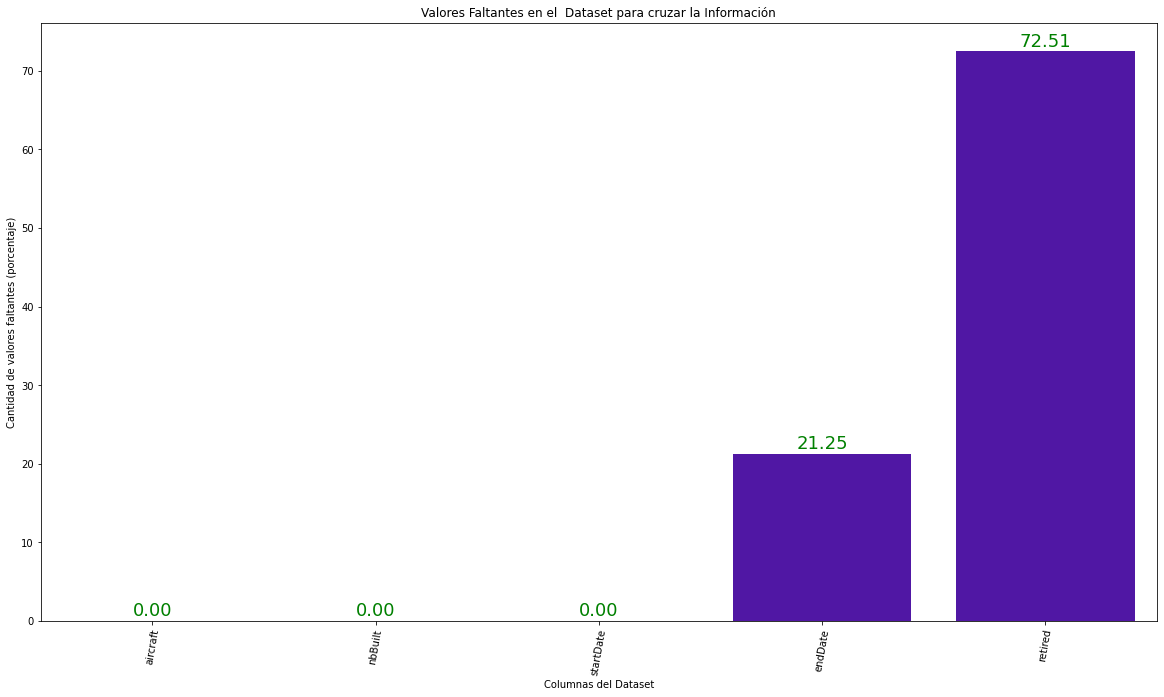

In [11]:
nulos = (df_aeronaves.isnull().sum()) / len(df_aeronaves) * 100
f.graficarBar(nulos.index, nulos, 'Valores Faltantes en el  Dataset para cruzar la Información', 'Columnas del Dataset', 'Cantidad de valores faltantes (porcentaje)')

En el gráfico anterior podemos ver que la columna endDate y retired tienen muchos valores faltantes pero en endDate los campos vacios significan que la eronave todavía se está fabricando y en retired hay datos faltantes porque no todos los fabricantes brindan información del año o fecha en que caducaría el modelo.

## <span style="color:#65ee30">*Dataset creado a partir del cruzamiento de datos*</span>

En esta etapa final vamos a relacion ambos datasets para conocer el año de fabricación de las aeronaves y el año en que se dejaron de fabricar para luego, sacar nuestras conclusiones.

### <span style="color:#ff4430">Obtención de la Fecha de Fabricación</span>

In [50]:
from datetime import datetime as dt

In [51]:
# DataFrame procesado
df_fab = pd.read_csv(r'csv/AccidentesAereosv6.csv')
# DataFrame de modelos descargados
df_modelos = pd.read_csv(r'csv/aircraft_data.csv')

In [54]:
# Convertimos los nulos de fecha a 0
df_modelos['endDate'].fillna(0, inplace=True)

In [55]:
# Completamos la columna
# Valor -1 -> Sin dato
# Valor  0 -> todabía en fabricación
# Valor int -> Fecha de finalización de su fabricación
df_fab['FechaFinFabricacion'] = -1

In [56]:
# Buscamos el modelo coincidente
fin_sd = len(df_fab)
fin_cd = len(df_modelos)
for i in range(fin_sd):
    anio = 0
    modelo_a_buscar = df_fab['TipoAeronave'].iloc[i]
    modelo_a_buscar.lower()
    for j in range(fin_cd):
        modelo_buscado = df_modelos['aircraft'].iloc[j]
        modelo_buscado.lower()
        if modelo_a_buscar.find(modelo_buscado) != -1:
            anio = int(df_modelos['endDate'].iloc[j])
            df_fab['FechaFinFabricacion'].iloc[i] = anio

C:\Users\lalay\AppData\Local\Temp\ipykernel_5312\535769730.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fab['FechaFinFabricacion'].iloc[i] = anio


In [57]:
df_fab['FechaFinFabricacion'][df_fab.FechaFinFabricacion == -1].count()

3725

In [58]:
df_fab['TipoAeronave'].value_counts()

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
                                           ... 
Vickers Viscount 759D                         1
H-21B                                         1
Avro 685 York C1                              1
Piper PA-24-250 Comanche                      1
Antonov An 26B-100                            1
Name: TipoAeronave, Length: 2469, dtype: int64

In [61]:
df_fab[df_fab['TipoAeronave'] == 'Douglas DC-3'].head()

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra,Longitud,Latitud,FechaFinFabricacion
476,1937-10-06 00:00:00,"Palembang, Netherlands Indies",KLM Royal Dutch Airlines,Palembang - Singapore,Douglas DC-3,11,4,7,4,3,1,0,-68.938637,12.110041,1942
477,1937-10-17 00:00:00,"Haydens Peak, Wyoming",United Air Lines,Newark - Chicago - Cheyenne - Salt Lake City -...,Douglas DC-3,19,3,16,19,3,16,0,-107.568534,43.170026,1942
536,1938-11-14 00:00:00,"Schiphol, Amsterdam",KLM Royal Dutch Airlines,Berlin - Amsterdam,Douglas DC-3,19,5,14,6,4,2,0,4.758460,52.308126,1942
569,1939-09-26 00:00:00,North Sea,KLM Royal Dutch Airlines,Copenhagen - Amsterdam,Douglas DC-3,20,5,15,1,0,1,0,9.738553,52.374478,1942
588,1940-08-23 00:00:00,"Cluj, Romania",LARES,Baia Mare - Cluj-Napoca - Sibiu - Bucharest,Douglas DC-3,15,3,12,15,3,12,0,23.589954,46.769379,1942


In [59]:
df_fab.head()

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra,Longitud,Latitud,FechaFinFabricacion
0,1908-09-17 00:00:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,0,1,0,-77.072192,38.895137,-1
1,1909-09-07 00:00:00,"Juvisy-sur-Orge, France",Sin dato,Air show,Wright Byplane,1,1,0,1,0,0,0,2.373809,48.690406,-1
2,1912-07-12 00:00:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,5,0,5,5,0,0,-74.422935,39.364285,-1
3,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",Private,Sin dato,Curtiss seaplane,1,1,0,1,1,0,0,-123.364953,48.428318,-1
4,1913-09-09 00:00:00,Over the North Sea,Military - German Navy,Sin dato,Zeppelin L-1 (airship),20,0,0,14,0,0,0,-123.364953,48.428318,-1


In [ ]:
#Guardamos
df_fab.to_csv("csv/AccidentesAereosv7.csv", index=False)

### <span style="color:#ff4430">Verificamos la cantidad de personas</span>

In [62]:
df_cant = pd.read_csv('csv/AccidentesAereosv7.csv')

In [63]:
# Verificamos las cantidades de personas a bordo y fallecidas

corregidos = 0
# recorremos el DataFrame
for i in df_cant.index:

    # Cargamos los datos en variables
    total_abordo = df_cant.loc[i, 'TotalAbordo']
    total_muertos = df_cant.loc[i, 'TotalFallecidos']
    trip_abordo = df_cant.loc[i, 'TripulacionAbordo']
    pasaj_abordo = df_cant.loc[i, 'PasajerosAbordo']
    trip_muerta = df_cant.loc[i, 'TripulacionFallecida']
    pasaj_muertos = df_cant.loc[i, 'PasajerosFallecidos']

    # La cantidad de fallecidos no puede ser mayor que la totalidad a bordo
    # si es así, cambiamos el valor a la totalidad a bordo
    if total_muertos > total_abordo:
        total_muertos = total_abordo
        corregidos += 1
    
    # La suma de tripulación y pasajeros a bordo debe ser igual al total a bordo
    # de ser incorrecto algún valor, lo corregimos
    if (trip_abordo + pasaj_abordo) > total_abordo:
        trip_abordo = total_abordo - pasaj_abordo
        corregidos += 1
    elif (trip_abordo + pasaj_abordo) < total_abordo:
        # Si hay menos personas a bordo que el total abordo, corregimos
        trip_abordo= total_abordo - pasaj_abordo
        corregidos += 1

    # Si la suma de tripulación y pasajeros fallecidos es diferente al total de fallecidos,
    # corregimos un valor para que coincida con el total de fallecidos
    if (trip_muerta + pasaj_muertos) > total_muertos:
        trip_muerta= total_muertos - pasaj_muertos
        corregidos += 1
    elif (trip_muerta + pasaj_muertos) < total_muertos:
        trip_muerta = total_muertos - pasaj_muertos
        corregidos += 1

    # Guardamos los datos en el Dataframe
    df_cant.loc[i, 'TotalAbordo'] = total_abordo 
    df_cant.loc[i, 'TotalFallecidos'] = total_muertos 
    df_cant.loc[i, 'TripulacionAbordo'] = trip_abordo 
    df_cant.loc[i, 'PasajerosAbordo'] = pasaj_abordo 
    df_cant.loc[i, 'TripulacionFallecida'] = trip_muerta 
    df_cant.loc[i, 'PasajerosFallecidos'] = pasaj_muertos 


print(f'Corregidos: {corregidos}')

Corregidos: 504


In [ ]:
#Guardamos este será el definitivo
#df_cant.to_csv('csv/AccidentesAereosv8.csv', index=False)
df_cant.to_csv('csv/AccidentesAereosDefinitivos.csv', index=False)

## <span style="color:#65ee30">*Dataset Definitivo*</span>

In [65]:
df_definitivo = pd.read_csv(r'csv/AccidentesAereosDefinitivos.csv')
df_definitivo.head()

,Fecha,LugarAccidente,Operador,OrigenDestino,TipoAeronave,TotalAbordo,TripulacionAbordo,PasajerosAbordo,TotalFallecidos,TripulacionFallecida,PasajerosFallecidos,FallecidosEnTierra,Longitud,Latitud,FechaFinFabricacion
0,1908-09-17 00:00:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,0,1,0,-77.072192,38.895137,-1
1,1909-09-07 00:00:00,"Juvisy-sur-Orge, France",Sin dato,Air show,Wright Byplane,1,1,0,1,1,0,0,2.373809,48.690406,-1
2,1912-07-12 00:00:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,5,0,5,5,0,0,-74.422935,39.364285,-1
3,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",Private,Sin dato,Curtiss seaplane,1,1,0,1,1,0,0,-123.364953,48.428318,-1
4,1913-09-09 00:00:00,Over the North Sea,Military - German Navy,Sin dato,Zeppelin L-1 (airship),20,20,0,14,14,0,0,-123.364953,48.428318,-1


## <span style="color:#65ee30">*Insertamos los datos en la Base de datos*</span>

In [66]:
df_db = pd.read_csv(r'csv/AccidentesAereosDefinitivos.csv')

In [68]:
import pymysql
import pandas as pd
from datetime import datetime as dt

In [69]:
# Abrimos la conexión
db = pymysql.connect(host='localhost', user='root', passwd='Lala0718', db='aeroaccidente')
cur = db.cursor()

# Insertamos los registros
fin = len(df_db)
for i in range(fin):
    fecha = df_db['Fecha'][i]
    lugar_acc = df_db['LugarAccidente'][i]
    operador = df_db['Operador'][i]
    orig_dest = df_db['OrigenDestino'][i]
    tip_aeronave = df_db['TipoAeronave'][i]
    tot_abordo = df_db['TotalAbordo'][i]
    trip_abordo = df_db['TripulacionAbordo'][i]
    pasaj_abordo = df_db['PasajerosAbordo'][i]
    tot_muertos = df_db['TotalFallecidos'][i]
    trip_muerta = df_db['TripulacionFallecida'][i]
    pasaj_muertos = df_db['PasajerosFallecidos'][i]
    muertos_tierra = df_db['FallecidosEnTierra'][i]
    lng = df_db['Longitud'][i]
    lat = df_db['Latitud'][i]
    anio = df_db['FechaFinFabricacion'][i]

    # Query
    qry = 'INSERT INTO accidente \
           (Fecha, LugarAccidente, Operador, OrigenDestino, \
            TipoAeronave, TotalAbordo, TripulacionAbordo, PasajerosAbordo, \
            TotalFallecidos, TripulacionFallecida, PasajerosFallecidos, \
            FallecidosEnTierra, Longitud, Latitud, AnioFinFabricacion) \
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);'
    cur.execute(qry,(fecha, lugar_acc, operador, orig_dest, tip_aeronave, tot_abordo, \
                     trip_abordo, pasaj_abordo, tot_muertos, trip_muerta, pasaj_muertos, \
                     muertos_tierra, lng, lat, anio))
    db.commit()
    try:
        db.rollback()
    except:
        print('Error al enviar los datos')


# Cerramos la conexión
cur.close()
db.close()